In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import random
from tokenizer import word_char

In [2]:
data = pd.read_csv('data1.csv')
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [3]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

In [4]:
data['strength'].value_counts()

1    496801
0     89702
2     83376
Name: strength, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669879 entries, 0 to 669878
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669878 non-null  object
 1   strength  669879 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ MB


In [6]:
data.isna().sum()

password    1
strength    0
dtype: int64

In [7]:
data.loc[data['password'].isna()==True]

,password,strength
367718,NaN,0


In [8]:
data.dropna(inplace=True)
data.isna().sum()

password    0
strength    0
dtype: int64

<AxesSubplot:xlabel='strength', ylabel='count'>

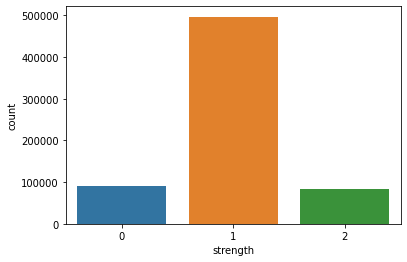

In [9]:
sns.countplot(data['strength'])

In [10]:
pwd_tuple = np.array(data)
pwd_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [11]:
random.shuffle(pwd_tuple)

In [12]:
x = [labels[0] for labels in pwd_tuple]
y = [labels[1] for labels in pwd_tuple]

In [ ]:
def word_to_char(word):
    character = []
    for i in word:
        character.append(i)
    return character

In [ ]:
word_to_char('kzde5577')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
vectorizer = TfidfVectorizer(tokenizer=word_char)

In [16]:
X = vectorizer.fit_transform(x)

In [17]:
vectorizer.get_feature_names()

['\x05',
 '\x06',
 '\x08',
 '\x10',
 '\x12',
 '\x16',
 '\x17',
 '\x19',
 '\x1b',
 '\x1c',
 '\x1e',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\x81',
 '\x8d',
 '¡',
 '¤',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '·',
 'º',
 '¼',
 '¾',
 '¿',
 'ß',
 'à',
 'á',
 'â',
 'ä',
 'å',
 'æ',
 'ç',
 'é',
 'ê',
 'í',
 'î',
 'ï',
 'ð',
 'ñ',
 'ò',
 'ó',
 'ô',
 'õ',
 'ö',
 '÷',
 'ù',
 'ú',
 'û',
 'ü',
 'ý',
 'þ',
 'ÿ',
 'ƒ',
 '‚']

In [18]:
first_doc_vector = X[0]
first_doc_vector

<1x125 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [19]:
first_doc_vector.T.todense()

matrix([[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.56648685],
        [0.        ],
        [0.5914069 ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0

In [20]:
df = pd.DataFrame(first_doc_vector.T.todense(),index=vectorizer.get_feature_names(),columns=['TF-IDF'])
df.sort_values(by='TF-IDF',ascending=False)

,TF-IDF
7,0.591407
5,0.566487
z,0.336238
k,0.292289
d,0.286026
...,...
<,0.000000
;,0.000000
9,0.000000
8,0.000000


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.25,random_state=42)

In [23]:
X_train.shape

(502408, 125)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
clf = LogisticRegression(random_state=100,multi_class='multinomial')
clf.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=100)

In [26]:
dt = np.array(['AA0012345@!'])
pred = vectorizer.transform(dt)
clf.predict(pred)

array([2])

In [27]:
y_pred = clf.predict(X_test)

In [28]:
set(y_pred)

{0, 1, 2}

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [30]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[  6767,  15709,     23],
       [  4680, 116235,   3070],
       [    35,   6709,  14242]], dtype=int64)

In [31]:
ac = accuracy_score(y_test,y_pred)
ac

0.8195139427957246

In [32]:
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.59      0.30      0.40     22499
           1       0.84      0.94      0.89    123985
           2       0.82      0.68      0.74     20986

    accuracy                           0.82    167470
   macro avg       0.75      0.64      0.68    167470
weighted avg       0.80      0.82      0.80    167470



In [33]:
import pickle as pkl

In [35]:
with open('model.pkl','wb') as file:
    pkl.dump(clf,file)
    
with open('vectorizer3.pkl','wb') as file:
    pkl.dump((vectorizer,word_char),file)